# **About the Data**

**Dataset Source & Link:**  Kaggle, Indicators of Heart Diseases  
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

**Time Coverage:** 2022 CDC Annual Health Survey

**Shape (row x columns):** 40882 x 40

**Units:**
- BMI (Kg/m^2)
- HeightInMeters (m)
- WeightInKilograms (Kg)
- SleepHours (Hours)
- PhysicalHealthDays, MentalHealthDays (number of days, 0-30)

**Column Directory:**
- Demographics ('State', 'Sex' etc)
- General Health ('PhysicalHealthDays', 'MentalHealthDays', etc)
- Medical History ('HadHeartAttack', 'HadDiabetes', etc)
- Health Behaviour ('SmokerStatus', 'AlcoholDrinker', etc)
- Vaccination ('FluVaxLast12', 'PneumoVaxEver', etc)
- Dental Records ('RemovedTeeth')

**Missingness/Outlier Snapshot:**
- Most categorical columns (Demographics, Yes/No Medical History, Behaviours) ≈ 0% missing
- A few numerical columns have some missing data:
    * 'WeightInKilograms' ≈ 4% missing
    * 'HeightInMeters' ≈ 4% missing
    * 'SleepInHours' ≈ 2-3% missing
    * 'BMI' < 1% missing
- Filtered BMI to 15-70 range for regression plot to reduce influence of outliers
Overall the dataset is mostly complete, with only minor gaps in the numeric health measure.

**Known Quirks:**
- 'AgeCategory' is grouped into categories instead of raw ages
-  Self reported data (height, weight, etc)  may be inaccurate
-  Small percentage of missing data

**Derived Columns:**
- BMI_range: groups BMI into different categories (Underweight, Normal, Overweight, Obese) for more interpretable visuals



In [2]:
# PROFESSOR'S SOLUTION
# !curl -L -o heart_disease.zip \
#   https://www.kaggle.com/api/v1/datasets/download/kamilpytlak/personal-key-indicators-of-heart-disease


# !unzip -o heart_disease.zip -d ./heart_disease_data

# #!ls heart_disease_data/2022/heart_2022_no_nans

import pandas as pd
hp = pd.read_csv("heart_2022_no_nans.csv")


hp.info()
hp.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204537 entries, 0 to 204536
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      204537 non-null  object 
 1   Sex                        204537 non-null  object 
 2   GeneralHealth              204537 non-null  object 
 3   PhysicalHealthDays         204537 non-null  float64
 4   MentalHealthDays           204537 non-null  float64
 5   LastCheckupTime            204537 non-null  object 
 6   PhysicalActivities         204537 non-null  object 
 7   SleepHours                 204537 non-null  float64
 8   RemovedTeeth               204537 non-null  object 
 9   HadHeartAttack             204537 non-null  object 
 10  HadAngina                  204537 non-null  object 
 11  HadStroke                  204537 non-null  object 
 12  HadAsthma                  204537 non-null  object 
 13  HadSkinCancer              20

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
hp.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
hp.columns = [c.strip().lower().replace(" ", "_") for c in hp.columns]

# normalize Yes/No columns to 1/0
yes_no_map = {"Yes": 1, "No": 0}
for col in hp.select_dtypes(include="object").columns:
    if set(hp[col].unique()) <= set(yes_no_map.keys()):
        hp[col] = hp[col].map(yes_no_map)

# check balance of target column (assuming "HadHeartAttack")
if "HadHeartAttack".lower() in hp.columns:
    target_col = "hadheartattack"
    print("Target distribution:")
    print(hp[target_col].value_counts())



hp.describe()



Target distribution:
hadheartattack
0    193256
1     11281
Name: count, dtype: int64


,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadangina,hadstroke,hadasthma,hadskincancer,hadcopd,...,hadarthritis,deaforhardofhearing,blindorvisiondifficulty,difficultyconcentrating,difficultywalking,difficultydressingbathing,difficultyerrands,heightinmeters,weightinkilograms,bmi
count,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,204537.000000,...,204537.000000,204537.000000,204537.000000,204537.00000,204537.000000,204537.000000,204537.000000,204536.000000,204536.000000,204536.000000
mean,4.096408,4.168757,0.776104,7.016867,0.055154,0.061099,0.041406,0.146379,0.085921,0.078025,...,0.342960,0.085887,0.048246,0.10626,0.145744,0.033451,0.066017,1.705779,83.698752,28.674043
std,8.381841,8.101657,0.416854,1.449384,0.228281,0.239512,0.199227,0.353487,0.280248,0.268212,...,0.474699,0.280197,0.214285,0.30817,0.352850,0.179812,0.248313,0.106806,21.369686,6.515341
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.410000,292.570000,97.650000


In [5]:
#B.1 Vectorized boolean mask
if "physicalhealthdays" in hp.columns:
  hp["poor_physical_health"] = (hp["physicalhealthdays"] >= 15)
if "mentalhealthdays" in hp.columns:
  hp["poor_mental_health"] = (hp["mentalhealthdays"] >= 15)
if "bmi" in hp.columns:
  hp["obese_bmi"] = (hp["bmi"] >= 30)
if "sleephours" in hp.columns:
  hp["poor_sleep"] = (hp["sleephours"] <= 6)

In [6]:
#B.2 Single Column transformation using map or Series.apply
if "smokerstatus" in hp.columns and hp['smokerstatus'].dtype == "object":
  smap = {
      "Current smoker - now smokes evryday" : "current smoker",
      "Current smoker - now smokes some days" : "current smoker",
      "Former smoker" : "former",
      "Never smoked" : "never"
  }
hp["smoker_simple"] = hp["smokerstatus"].map(smap).fillna(hp["smokerstatus"])


In [7]:
#B.3 multi column logic
def composite_risk(row):
  score = 0
  for col in ["obese_bmi", "poor_physical_health", "poor_mental_health", "poor_sleep"]:
    if col in row and bool(row[col]):
      score += 1
  for col in ['hadheartattack', 'hadangina', 'hadstroke']:
    if col in row and row[col] in (1,1.0, True):
      score += 1
  return score

hp['composite_risk'] = hp.apply(composite_risk, axis=1)

In [8]:
#B.4 categorical bucketing
def sleep_bucket(x):
  if pd.isna(x): return "missing"
  if x < 6: return "short"
  if x <= 8: return "normal"
  return "long"

if "sleephours" in hp.columns:
  hp["sleep_bucket"] = hp["sleephours"].map(sleep_bucket)

def bmi_bucket(x):
  if pd.isna(x): return "missing"
  if x < 18.5: return "underweight"
  if x < 25: return "normal"
  if x < 30: return "overweight"
  return "obese"

if "bmi" in hp.columns:
  hp["bmi_bucket"] = hp["bmi"].map(bmi_bucket)

In [9]:
#B.5 Missing data handling
hp_imputed = hp.copy()
for c in hp_imputed.columns:
  if pd.api.types.is_numeric_dtype(hp_imputed[c]):
    hp_imputed[c] = hp_imputed[c].fillna(hp_imputed[c].median())
  elif hp_imputed[c].dtype == "object":
    hp_imputed[c] = hp_imputed[c].fillna("unknown")

hp_imputed.head()

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,highrisklastyear,covidpos,poor_physical_health,poor_mental_health,obese_bmi,poor_sleep,smoker_simple,composite_risk,sleep_bucket,bmi_bucket
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,No,No,False,False,False,False,former,0,long,overweight
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,No,No,False,False,True,True,former,2,normal,obese
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,No,Yes,False,False,True,False,former,1,normal,obese
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,No,Yes,False,False,True,False,never,1,long,obese
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,...,No,No,False,True,True,True,never,3,short,obese


In [10]:
#C.1 value_counts() with interpretation
y = "cvd_any" if "cvd_any" in hp_imputed.columns else target_col
if y and y in hp_imputed.columns:
  vc = hp_imputed[y].value_counts(dropna=False)
  print(f"{y} counts: \n{vc}")
  print(f"\nPrevalence: {(hp_imputed[y].mean()*100):.2f}%")

hadheartattack counts: 
hadheartattack
0    193256
1     11281
Name: count, dtype: int64

Prevalence: 5.52%


In [11]:
#C.2.a GroupBy
if {"agecategory",y}.issubset(hp_imputed.columns):
  g_age = (hp_imputed.groupby("agecategory", dropna=False)
          .agg(n=(y,"size"), prevalence=(y,"mean"))
          .assign(prevalence_pct=lambda t: (t["prevalence"]*100).round(2))
          .sort_values(["prevalence","n"], ascending=[False,False])
          .reset_index())
  display(g_age)

,agecategory,n,prevalence,prevalence_pct
0,Age 80 or older,14914,0.137455,13.75
1,Age 75 to 79,14951,0.114976,11.50
2,Age 70 to 74,21271,0.095858,9.59
3,Age 65 to 69,23595,0.075906,7.59
4,Age 60 to 64,22050,0.059909,5.99
5,Age 55 to 59,18435,0.051587,5.16
6,Age 50 to 54,16435,0.036021,3.60
7,Age 45 to 49,13870,0.024585,2.46
8,Age 40 to 44,14081,0.013422,1.34
9,Age 35 to 39,13010,0.010069,1.01


In [12]:
#C.2.b Groupby
need = {"sleep_bucket","sex", y}
if need.issubset(hp_imputed.columns):
  g_sleep_sex = (hp_imputed.groupby(["sleep_bucket","sex"], dropna=False)
                  .agg(n=(y,"size"), prevalence=(y,"mean"))
                  .assign(prevalence_pct=lambda t: (t["prevalence"]*100).round(2))
                  .sort_values(["prevalence","n"], ascending=[False,False])
                  .reset_index())
  display(g_sleep_sex)

,sleep_bucket,sex,n,prevalence,prevalence_pct
0,long,Male,7369,0.122269,12.23
1,short,Male,10320,0.099322,9.93
2,short,Female,11416,0.068325,6.83
3,normal,Male,81088,0.064375,6.44
4,long,Female,9158,0.058419,5.84
5,normal,Female,85186,0.033104,3.31


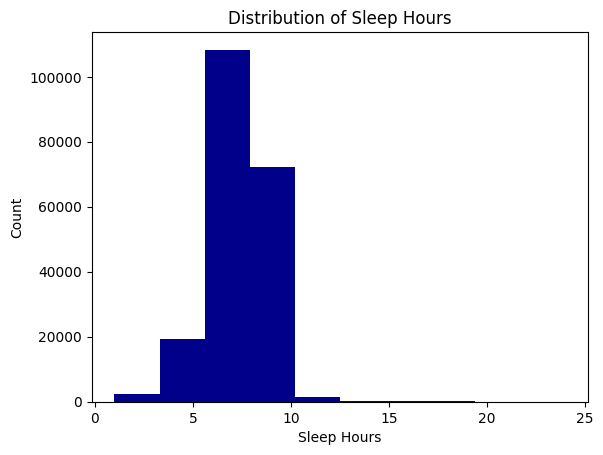

In [13]:
import matplotlib.pyplot as plt

df = hp_imputed

# D1 histogram #1 (distribution of a meaningful numeric column)
plt.hist(df['sleephours'], bins=10, color='darkblue')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.title('Distribution of Sleep Hours')
plt.show()


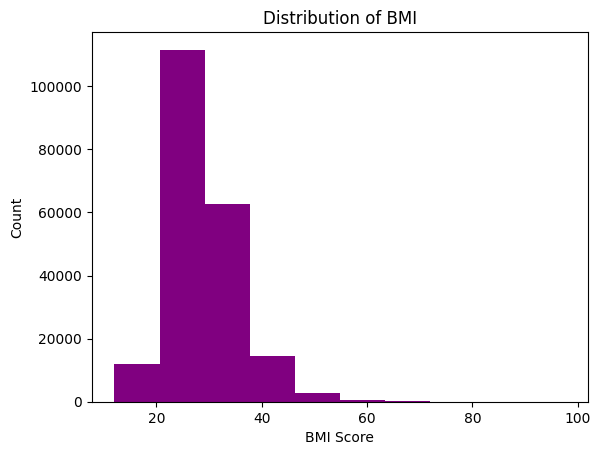

In [14]:
# D1 histogram #2

plt.hist(df['bmi'], bins=10, color='purple')
plt.xlabel('BMI Score')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

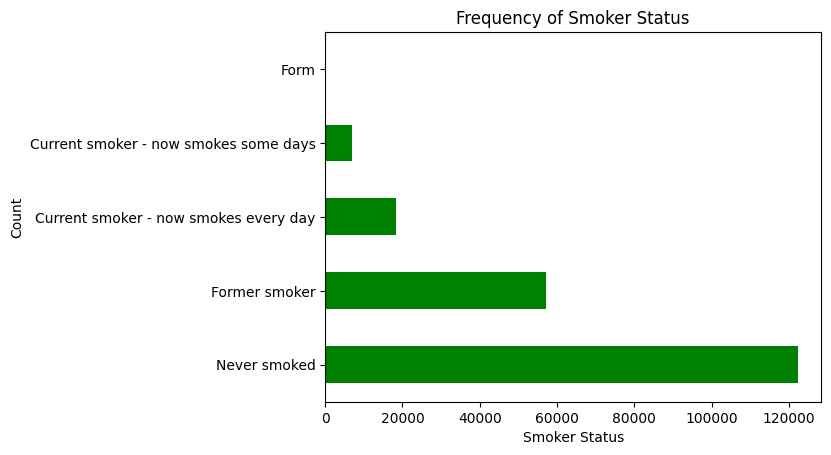

In [15]:
# D2 frequency/compare chart #1

df['smokerstatus'].value_counts().plot(kind='barh', color='green')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Frequency of Smoker Status')
plt.show()

Text(0.5, 1.0, 'Frequency of Heart Attack by Sex')

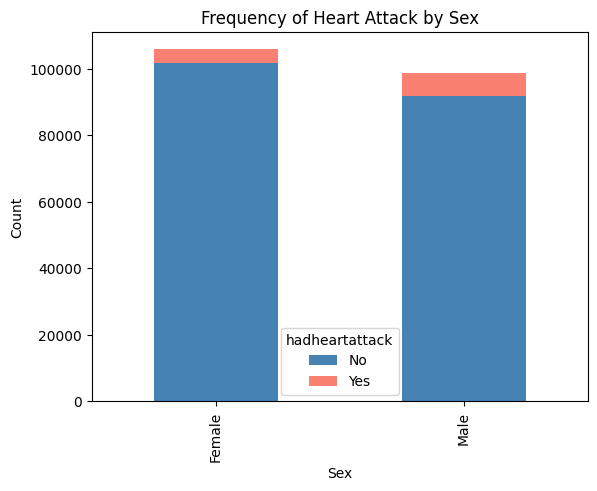

In [16]:
# D2 frequency/compare chart #2
df.groupby('sex')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='bar', stacked=True, color=['steelblue', 'salmon'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Frequency of Heart Attack by Sex')

Text(0.5, 1.0, 'Frequency of Heart Attack by Age Category')

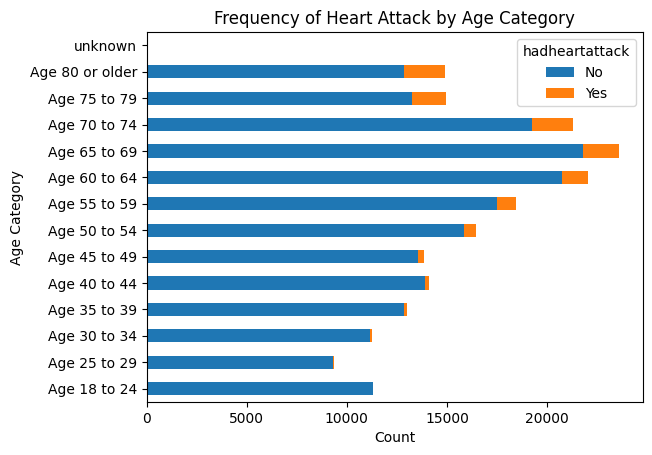

In [17]:
# D2 frequency/compare chart #3
df.groupby('agecategory')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Age Category')
plt.title('Frequency of Heart Attack by Age Category')

Text(0.5, 1.0, 'Frequency of Heart Attack based on Ethnicity')

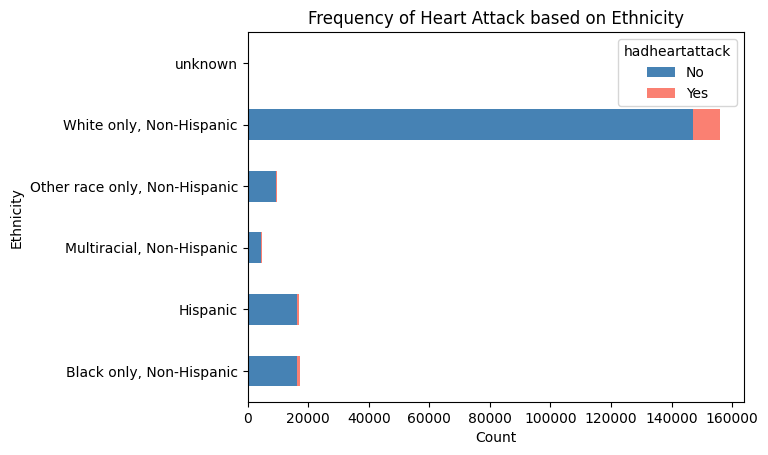

In [18]:
# D2 frequency/compare chart #4
df.groupby('raceethnicitycategory')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='barh', stacked=True, color=['steelblue', 'salmon'])
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Frequency of Heart Attack based on Ethnicity')

In [19]:
# PA3 B
def bmi_range(bmi):
  if bmi < 18.5:
    return "Underweight"
  elif 18.5 <= bmi < 25:
    return "Normal"
  elif 25 <= bmi < 30:
    return "Overweight"
  else:
    return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_range)

The BMI range transformation is necessary for clarity and comparability. It will allow us to compare heart attack frequency across BMI groups, which can help reveal underlying patterns.

Text(0.5, 1.0, 'Heart Attack by BMI')

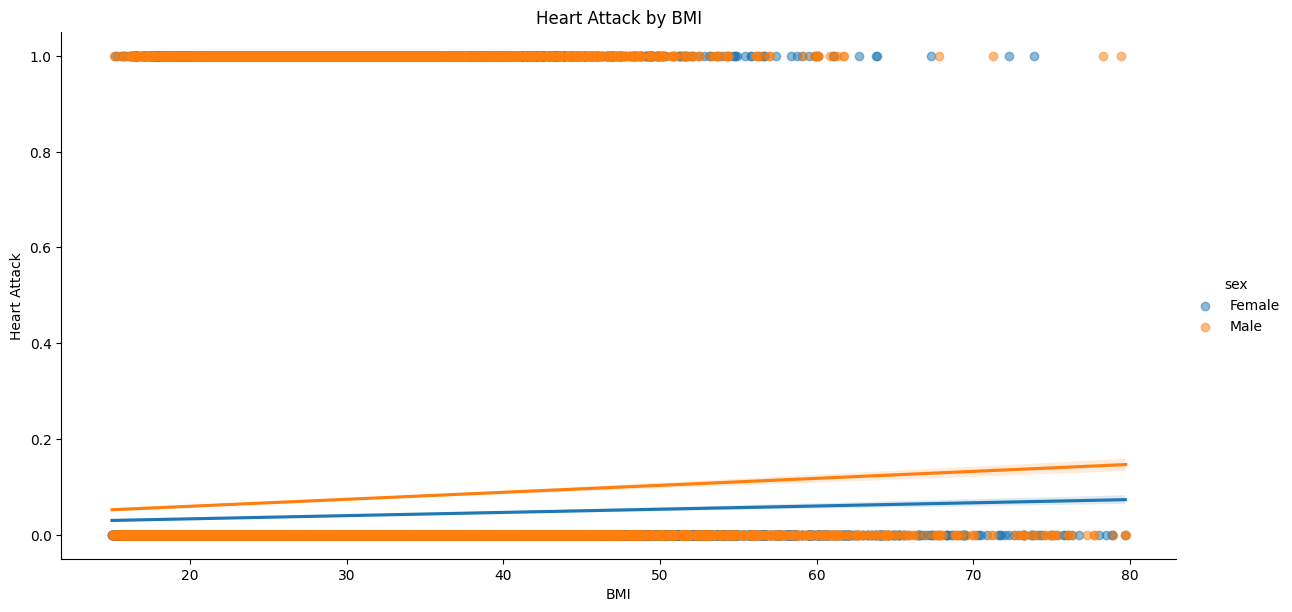

In [20]:
# PA3 Regression View
import seaborn as sns

df_filtered = df[(df['bmi'] > 15) & (df['bmi']<= 80)]

# Logistic regression view #1
sns.lmplot(
    data=df_filtered,
    x='bmi',
    y='hadheartattack',
    hue='sex',
    ci=95,
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.5},
)

plt.xlabel('BMI')
plt.ylabel('Heart Attack')
plt.title('Heart Attack by BMI')




In the regression view above, we used ci=95 so there would be a shaded band around the regression line indicating the 95% confidence interval. We did not use order because we are using the numerical BMI values and not the BMI categories. We filtered out the outliers in the BMI that are less than 15 and equal to or greater than 80.

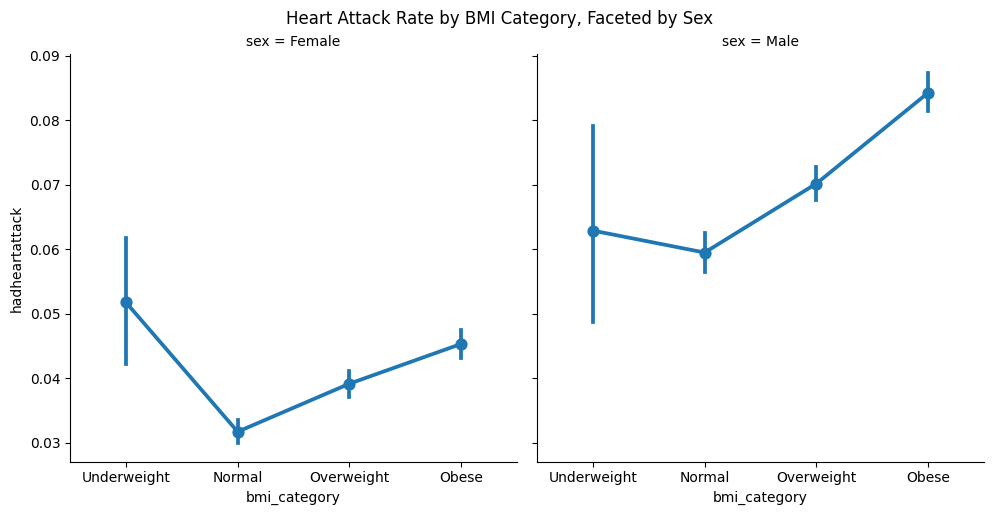

In [21]:
# PA3 Small multiples
import numpy as np
g = sns.catplot(
    data=df_filtered,
    x="bmi_category", y="hadheartattack",
    col="sex", kind="point", #using point for means
    estimator=np.mean,
    errorbar=("ci", 95),
    order=["Underweight", "Normal", "Overweight", "Obese"],
    height=5, aspect=1,
    sharex=True, sharey=True
)

g.fig.suptitle("Heart Attack Rate by BMI Category, Faceted by Sex", y=1.02)
plt.show()


In the categorical plot, females show a slight increase in heart attack rate across BMI groups, while males remain flat at lower BMI but rise noticeably in overweight and obese categories; error bars represent 95% confidence intervals around the mean rates.

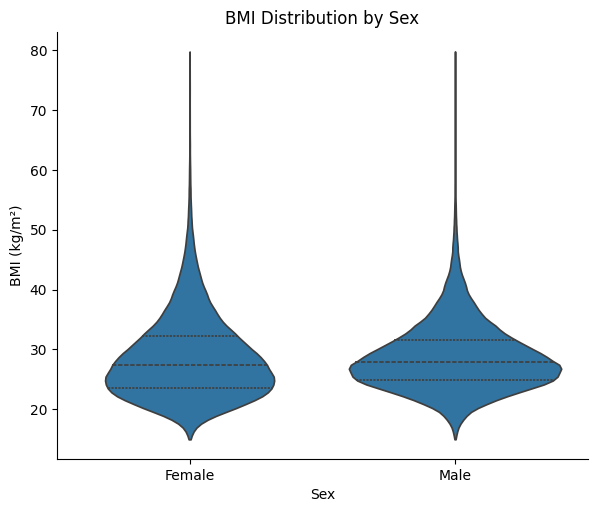

In [24]:
# PA3 catgegorical distribution

sns.catplot(
    data=df_filtered,
    x="sex", y="bmi",
    kind="violin", cut=0, inner="quartile",
    height=5, aspect=1.2
).set(
    xlabel="Sex",
    ylabel="BMI (kg/m²)",
    title="BMI Distribution by Sex"
)
plt.show()



The violin plot shows that both males and females have similar BMI distributions centered around the mid-20s, with most values falling between roughly 20 and 35 kg/m^2 and a few higher outliers, indicating comparable overall body composition patterns across sexes.

In [22]:
# PA3 Statistical check

from scipy.stats import linregress

# Run linear regression: BMI → heart attack (0/1)
lr = linregress(df_filtered["bmi"], df_filtered["hadheartattack"])

print(f"Slope: {lr.slope:.4f}")
print(f"Intercept: {lr.intercept:.4f}")
print(f"P-value: {lr.pvalue:.4f}")
print(f"R^2: {lr.rvalue**2:.3f}")


Slope: 0.0010
Intercept: 0.0262
P-value: 0.0000
R^2: 0.001


The regression slope (0.0011, p<0.001) indicates a very small positive association between BMI and heart-attack occurrence. However, the R^2 value (0.001) shows that BMI explains almost none of the variance in heart-attack outcomes, suggesting that other factors are far more important predictors